In [1]:
import os
import glob

import pandas as pd
import numpy as np
import seaborn as sns

from tqdm.notebook import tqdm, trange
import time

#nltk.download('punkt') #Uncomment if first run
#nltk.download('wordnet') #Uncomment if first run
#nltk.download('stopwords')
#nltk.download('omw-1.4')
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.lm import counter

In [2]:
stop = set(stopwords.words('english'))

In [3]:
never_words = ['http', "n't", 'need', 'make', "jacksonwang852"]
def preprocess_tweets(element):
    lem=WordNetLemmatizer()
    words=[w for w in word_tokenize(element) if (w not in stop)]
    words=[lem.lemmatize(w.lower()) for w in words if len(w)>2]
    words=[word.lower() for word in words if word not in stop and word not in never_words]
    return words


In [4]:
#try:
#    df = pd.read_json('/home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/abortion_clinic.json')
#except ValueError:
#    df = pd.read_json('/home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/abortion_clinic.json', lines=True)
print(os.getcwd())

/home/karl/PycharmProjects/UCSF_dobbs_roe


In [5]:
directory = '/home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01' # must use absolute path

file_list = list(glob.glob(os.path.join(directory,'*.*')))

In [6]:
dfs = [] # an empty list to store the data frames
for file in tqdm(file_list):
    print("Reading json file: ",file)
    try:
        data = pd.read_json(open(file, 'r', encoding='utf-8'), lines = True) # read data frame from json file
        dfs.append(data) # append the data frame to the list
    except ValueError:
        print("\n***Error reading json file***: ", file, "\n")

all_df = pd.concat(dfs, ignore_index=True) # concatenate all the data frames in the list.

  0%|          | 0/40 [00:00<?, ?it/s]

Reading json file:  /home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/jackson.json
Reading json file:  /home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/wade_clinic.json

***Error reading json file***:  /home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/wade_clinic.json 

Reading json file:  /home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/wade_hospital.json

***Error reading json file***:  /home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/wade_hospital.json 

Reading json file:  /home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/dobbs_healthcare.json
Reading json file:  /home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/abortion_physician.json
Reading json file:  /home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/dobs_physician.json
Reading json file:  /home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/roe_visit.json
Reading json file:  /home/karl/PycharmProjects/UCSF_dobbs

In [7]:
all_df

_type  \
0       snscrape.modules.twitter.Tweet   
1       snscrape.modules.twitter.Tweet   
2       snscrape.modules.twitter.Tweet   
3       snscrape.modules.twitter.Tweet   
4       snscrape.modules.twitter.Tweet   
...                                ...   
677103  snscrape.modules.twitter.Tweet   
677104  snscrape.modules.twitter.Tweet   
677105  snscrape.modules.twitter.Tweet   
677106  snscrape.modules.twitter.Tweet   
677107  snscrape.modules.twitter.Tweet   

                                                      url  \
0       https://twitter.com/matt_nevett_/status/156997...   
1       https://twitter.com/Fionape30319092/status/156...   
2       https://twitter.com/ChelseaHanson/status/15699...   
3       https://twitter.com/WorldWearyWoman/status/156...   
4       https://twitter.com/FIRESTARTERrblx/status/156...   
...                                                   ...   
677103  https://twitter.com/gnomie34832511/status/1548...   
677104  https://twitter.com/Johnson1987Zach/status/154...   
677105  https://twitter.com/Christilynn_513/status/154...   
677106  https://twitter.com/patriciaw224/status/154816...   
677107  https://twitter.com/OverUnderClover/status/154...   

                            date  \
0      2022-09-14 08:44:14+00:00   
1      2022-09-14 08:44:13+00:00   
2      2022-09-14 08:44:00+00:00   
3      2022-09-14 08:43:55+00:00   
4      2022-09-14 08:43:49+00:00   
...                          ...   
677103 2022-07-16 04:55:29+00:00   
677104 2022-07-16 04:55:10+00:00   
677105 2022-07-16 04:54:30+00:00   
677106 2022-07-16 04:54:27+00:00   
677107 2022-07-16 04:54:12+00:00   

                                               rawContent  \
0       Wednesday Forum with ⁦@StevoMedia⁩ &amp; ⁦@mjb...   
1       @HairyMonkeyGor1 @tribunaltweets Absolutely lo...   
2       "Clear, light and instructive, The Sudden Loss...   
3       “It’s not a competition” … but Ms Jackson, you...   
4       Current fav songs are definitely got the time ...   
...                                                   ...   
677103  @skinhorse8 @RaoulasaurusRex @rhonda_harbison ...   
677104  Daughter of doctor who gave 10-year-old an abo...   
677105  @Whey_standard @JudiWebb @sarahmccammon So you...   
677106  Doctor who gave abortion to 10-year-old rape v...   
677107  @VerneoftheWest @thedailybeast He absolutely d...   

                                          renderedContent  \
0       Wednesday Forum with ⁦@StevoMedia⁩ &amp; ⁦@mjb...   
1       @HairyMonkeyGor1 @tribunaltweets Absolutely lo...   
2       "Clear, light and instructive, The Sudden Loss...   
3       “It’s not a competition” … but Ms Jackson, you...   
4       Current fav songs are definitely got the time ...   
...                                                   ...   
677103  @skinhorse8 @RaoulasaurusRex @rhonda_harbison ...   
677104  Daughter of doctor who gave 10-year-old an abo...   
677105  @Whey_standard @JudiWebb @sarahmccammon So you...   
677106  Doctor who gave abortion to 10-year-old rape v...   
677107  @VerneoftheWest @thedailybeast He absolutely d...   

                         id  \
0       1569970266117402624   
1       1569970263000846338   
2       1569970204733755394   
3       1569970186198962178   
4       1569970161318531073   
...                     ...   
677103  1548169427547406338   
677104  1548169344999297024   
677105  1548169178493755393   
677106  1548169164488970243   
677107  1548169102140661761   

                                                     user  replyCount  \
0       {'_type': 'snscrape.modules.twitter.User', 'us...           0   
1       {'_type': 'snscrape.modules.twitter.User', 'us...           0   
2       {'_type': 'snscrape.modules.twitter.User', 'us...           0   
3       {'_type': 'snscrape.modules.twitter.User', 'us...           0   
4       {'_type': 'snscrape.modules.twitter.User', 'us...           0   
...                                                   ...         ...   
677103  {'_t

In [8]:
all_df = all_df.drop_duplicates('id')
all_df.head()

_type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   
2  snscrape.modules.twitter.Tweet   
3  snscrape.modules.twitter.Tweet   
4  snscrape.modules.twitter.Tweet   

                                                 url  \
0  https://twitter.com/matt_nevett_/status/156997...   
1  https://twitter.com/Fionape30319092/status/156...   
2  https://twitter.com/ChelseaHanson/status/15699...   
3  https://twitter.com/WorldWearyWoman/status/156...   
4  https://twitter.com/FIRESTARTERrblx/status/156...   

                       date  \
0 2022-09-14 08:44:14+00:00   
1 2022-09-14 08:44:13+00:00   
2 2022-09-14 08:44:00+00:00   
3 2022-09-14 08:43:55+00:00   
4 2022-09-14 08:43:49+00:00   

                                          rawContent  \
0  Wednesday Forum with ⁦@StevoMedia⁩ &amp; ⁦@mjb...   
1  @HairyMonkeyGor1 @tribunaltweets Absolutely lo...   
2  "Clear, light and instructive, The Sudden Loss...   
3  “It’s not a competition” … but Ms Jackson, you...   
4  Current fav songs are definitely got the time ...   

                                     renderedContent                   id  \
0  Wednesday Forum with ⁦@StevoMedia⁩ &amp; ⁦@mjb...  1569970266117402624   
1  @HairyMonkeyGor1 @tribunaltweets Absolutely lo...  1569970263000846338   
2  "Clear, light and instructive, The Sudden Loss...  1569970204733755394   
3  “It’s not a competition” … but Ms Jackson, you...  1569970186198962178   
4  Current fav songs are definitely got the time ...  1569970161318531073   

                                                user  replyCount  \
0  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
1  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
2  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
3  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
4  {'_type': 'snscrape.modules.twitter.User', 'us...           0   

   retweetCount  likeCount  ...  retweetedTweet  quotedTweet inReplyToTweetId  \
0             0          0  ...             NaN         None              NaN   
1             0          0  ...             NaN         None     1.569961e+18   
2             0          0  ...             NaN         None              NaN   
3             0          0  ...             NaN         None              NaN   
4             0          0  ...             NaN         None              NaN   

                                       inReplyToUser  \
0                                               None   
1  {'_type': 'snscrape.modules.twitter.User', 'us...   
2                                               None   
3                                               None   
4                                               None   

                                      mentionedUsers coordinates place  \
0  [{'_type': 'snscrape.modules.twitter.User', 'u...        None  None   
1  [{'_type': 'snscrape.modules.twitter.User', 'u...        None  None   
2                                               None        None  None   
3                                               None        None  None   
4                                               None        None  None   

  hashtags  cashtags                                               card  
0     None      None  {'_type': 'snscrape.modules.twitter.SummaryCar...  
1     None      None                                               None  
2     None      None                                               None  
3     None      None                                               None  
4     None      None                                               None  

[5 rows x 28 columns]

In [9]:
all_df['preprocessedContent'] = all_df['rawContent'].apply(lambda x: preprocess_tweets(x))
all_df['preprocessedContent']

/tmp/ipykernel_16501/2648952838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['preprocessedContent'] = all_df['rawContent'].apply(lambda x: preprocess_tweets(x))


0         [wednesday, forum, stevomedia⁩, amp, mjbarlow2...
1         [hairymonkeygor1, tribunaltweets, absolutely, ...
2         [clear, light, instructive, sudden, loss, surv...
3         [competition, jackson, literally, said, seems,...
4         [current, fav, song, definitely, got, time, jo...
                                ...                        
677101    [ounderfolder, toifrogs, dylangiles34, dramyad...
677102    [whey_standard, judiwebb, sarahmccammon, sayin...
677103    [skinhorse8, raoulasaurusrex, rhonda_harbison,...
677105    [whey_standard, judiwebb, sarahmccammon, mean,...
677106    [doctor, gave, abortion, 10-year-old, rape, vi...
Name: preprocessedContent, Length: 642293, dtype: object

In [10]:
corpus = []
for i in tqdm(all_df['preprocessedContent']):
    for x in i:
        if x not in never_words:
            corpus.append(x.lower())

  0%|          | 0/642293 [00:00<?, ?it/s]

In [11]:
len(corpus)

11189433

<AxesSubplot:>

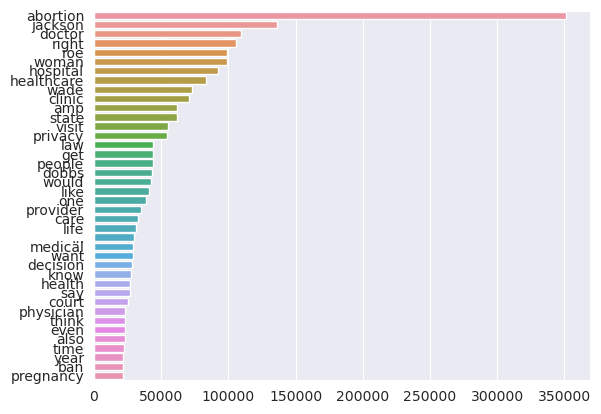

In [12]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

<AxesSubplot:>

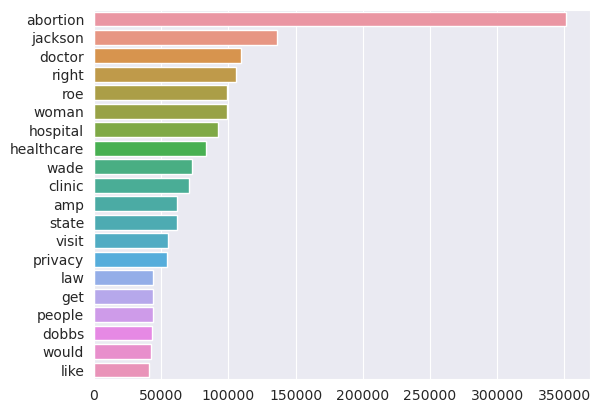

In [13]:
x, y= [], []
for word,count in most[:20]:
    x.append(word)
    y.append(count)

sns.barplot(x=y,y=x)

In [14]:
most

[('abortion', 351413),
 ('jackson', 135893),
 ('doctor', 109668),
 ('right', 105533),
 ('roe', 99001),
 ('woman', 98931),
 ('hospital', 92386),
 ('healthcare', 83691),
 ('wade', 73159),
 ('clinic', 70467),
 ('amp', 61972),
 ('state', 61720),
 ('visit', 55155),
 ('privacy', 54290),
 ('law', 44101),
 ('get', 43664),
 ('people', 43541),
 ('dobbs', 42916),
 ('would', 42620),
 ('like', 41068),
 ('one', 38462),
 ('provider', 34852),
 ('care', 32821),
 ('life', 31196),
 ('...', 29518),
 ('medical', 29125),
 ('want', 29115),
 ('decision', 28581),
 ('know', 27718),
 ('health', 26662),
 ('say', 26612),
 ('court', 25678),
 ('physician', 23340),
 ('think', 23182),
 ('even', 23055),
 ('also', 22941),
 ('time', 22145),
 ('year', 21844),
 ('ban', 21732),
 ('pregnancy', 21327),
 ('could', 21037),
 ('patient', 19711),
 ('baby', 19585),
 ('last', 19450),
 ('new', 19443),
 ('said', 19398),
 ('see', 18104),
 ('access', 17942),
 ('going', 17848),
 ('day', 17534),
 ('take', 17139),
 ('child', 17096),
 ('mic

In [15]:
import gensim.models

In [16]:
dic=gensim.corpora.Dictionary(all_df['preprocessedContent'])

In [17]:
bow_corpus = []
for doc in tqdm(all_df['preprocessedContent']):
    bow_corpus.append(dic.doc2bow(doc))

  0%|          | 0/642293 [00:00<?, ?it/s]

In [18]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 12,
                                   id2word = dic,
                                   passes = 15,
                                   workers = 44)
lda_model.show_topics()


[(8,
  '0.016*"dobbs" + 0.013*"jackson" + 0.009*"hospital" + 0.009*"miami-dade" + 0.009*"sr-836/airport/um/jackson" + 0.009*"i-95" + 0.009*"visit" + 0.008*"norte" + 0.008*"condado" + 0.008*"actualización"'),
 (11,
  '0.076*"jackson" + 0.021*"doctor" + 0.018*"michael" + 0.009*"que" + 0.008*"ronny" + 0.008*"like" + 0.007*"hospital" + 0.007*"trump" + 0.007*"..." + 0.006*"eye"'),
 (5,
  '0.018*"wade" + 0.009*"jackson" + 0.005*"water" + 0.005*"abortion" + 0.005*"jacksonwang" + 0.004*"magicman" + 0.004*"blue" + 0.003*"clinic" + 0.003*"like" + 0.003*"roe"'),
 (2,
  '0.046*"doctor" + 0.043*"abortion" + 0.034*"indiana" + 0.024*"10-year-old" + 0.019*"rape" + 0.017*"victim" + 0.012*"ohio" + 0.011*"attorney" + 0.010*"general" + 0.009*"performed"'),
 (6,
  '0.015*"worldwide_wade" + 0.009*"wade" + 0.007*"positive" + 0.006*"abortion" + 0.005*"jackson" + 0.005*"tested" + 0.005*"machina_nft" + 0.004*"hospital" + 0.004*"patient" + 0.004*"covid-19"'),
 (10,
  '0.021*"ibm" + 0.006*"abortion" + 0.006*"jack

In [19]:
import pyLDAvis.gensim_models
import pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

/home/karl/anaconda3/envs/UCSF_dobbs_roe/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/karl/anaconda3/envs/UCSF_dobbs_roe/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.214578  0.005285       1        1  27.830086
0     -0.218424 -0.015113       2        1  24.127394
1     -0.017544  0.141634       3        1  11.910502
9     -0.128577 -0.031127       4        1   9.020955
11     0.058873  0.161205       5        1   7.680128
7     -0.107007 -0.019140       6        1   6.017367
3      0.100402  0.123225       7        1   4.356838
2     -0.022525 -0.139618       8        1   2.220880
8      0.148929 -0.004504       9        1   1.917837
5      0.119892 -0.046232      10        1   1.817654
6      0.136548 -0.102416      11        1   1.764030
10     0.144009 -0.073201      12        1   1.336331, topic_info=          Term           Freq          Total Category  logprob  loglift
1032  abortion  371099.000000  371099.000000  Default  30.0000  30.0000
5      jackson  140123.000000  140123.000000  Default  29.0000  29.0000
401     doctor  162430.000000  162430.000000  Default  28.0000  28.0000
994   hospital   75051.000000   75051.000000  Default  27.0000  27.0000
646      visit   66220.000000   66220.000000  Default  26.0000  26.0000
...        ...            ...            ...      ...      ...      ...
56        said     185.315051   19799.831766  Topic12  -6.6932  -0.3561
153        get     181.180026   44650.679897  Topic12  -6.7157  -1.1919
647      would     176.207692   43948.889613  Topic12  -6.7436  -1.2039
54      people     172.856937   43555.387218  Topic12  -6.7628  -1.2141
646      visit     166.755076   66220.624877  Topic12  -6.7987  -1.6690

[991 rows x 6 columns], token_table=        Topic      Freq       Term
term                              
198418      4  0.994105  'chilling
280399      8  0.973309     'could
101048      5  0.992224        'he
283347      3  0.977920     'loved
125837      4  0.985055      'must
...       ...       ...        ...
1282       10  0.865759        王嘉尔
1282       11  0.019455        王嘉尔
1282       12  0.009728        王嘉尔
84802       6  0.996466     💻👨🏾‍💻🖥
87902       5  0.985236      🟩🟩🟩🟩🟩

[5027 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 2, 10, 12, 8, 4, 3, 9, 6, 7, 11])

In [20]:
# topics: "dobbs", "jackson", "roe", "wade", "abortion", "privacy", "doctor", "provider", "physician", "clinic", "visit", "hospital",
# ['http', "n't", 'need', 'make']